# Customer Churn Analysis

### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Univariate Analysis

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

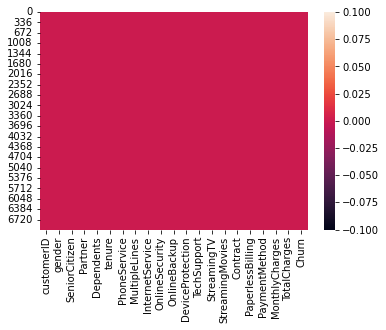

In [9]:
sns.heatmap(df.isnull())

There are no null values in the data set

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


These are the only 3 numerical type columns in the dataset. Tenure and Monthly charges have high standard deviation due to the vast range.

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Tenure, Monthly Charges and Totalcharges columns contain many unique values, the other columns contain 2-4 types of categorical values.

In [12]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

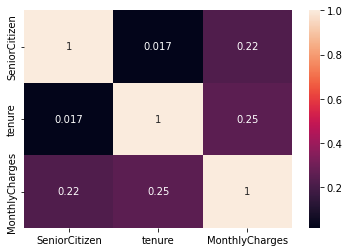

In [15]:
sns.heatmap(df.corr(), annot=True)

There are only 3 numerical columns now, and the correlation between them is very low.

In [16]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

There is skewness in senior citizen column, due to majority of the customers not being senior citizens.

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

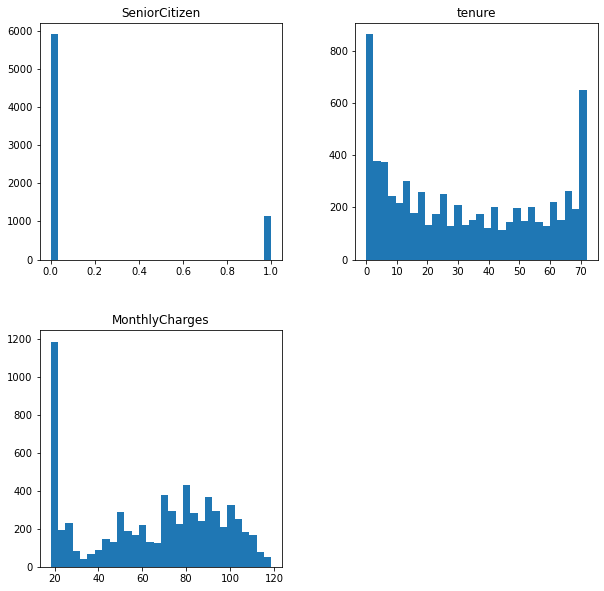

In [17]:
df.hist(figsize=(10,10), grid=False, layout=(2, 2), bins = 30)

There is normal distribution in every column except senior citizen column due to vast majority of the customers not being senior citizens.

<AxesSubplot:>

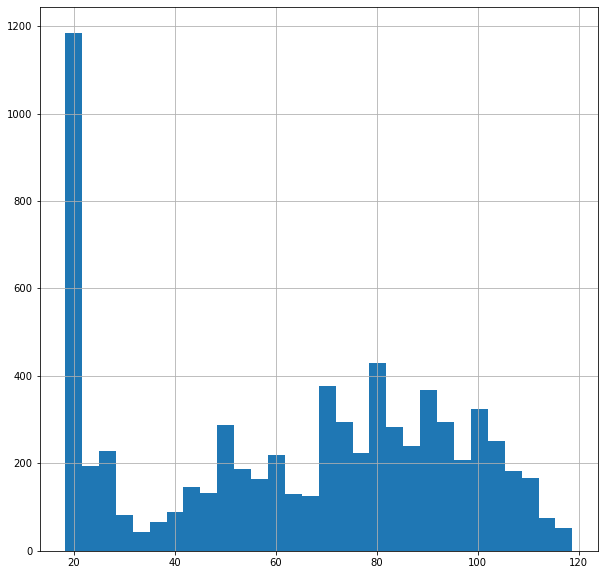

In [18]:
df['MonthlyCharges'].hist(figsize=(10,10), bins=30)

The monthly charges column is normally distributed, with maximum customers having monthly charge of 20 dollars.

<AxesSubplot:>

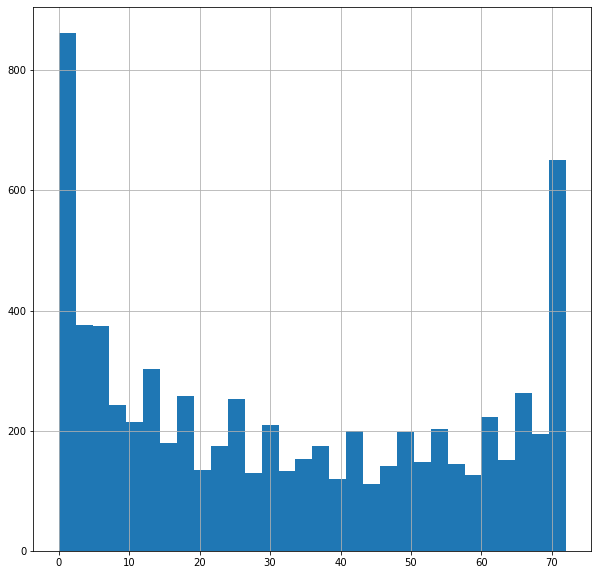

In [19]:
df['tenure'].hist(figsize=(10,10), bins=30)

The distribution for tenure column is most symmetric, with most customers have tenure of 0-5 or 65-70.

<AxesSubplot:>

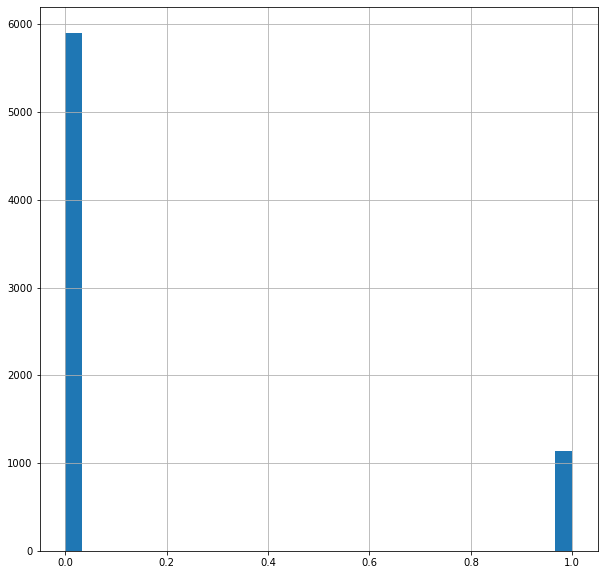

In [20]:
df['SeniorCitizen'].hist(figsize=(10,10), bins=30)

Only around 1100 customers are senior citizens, the rest are not. This is causing the skewness we observed earlier.

Text(0.5, 1.0, 'Outliers in the columns')

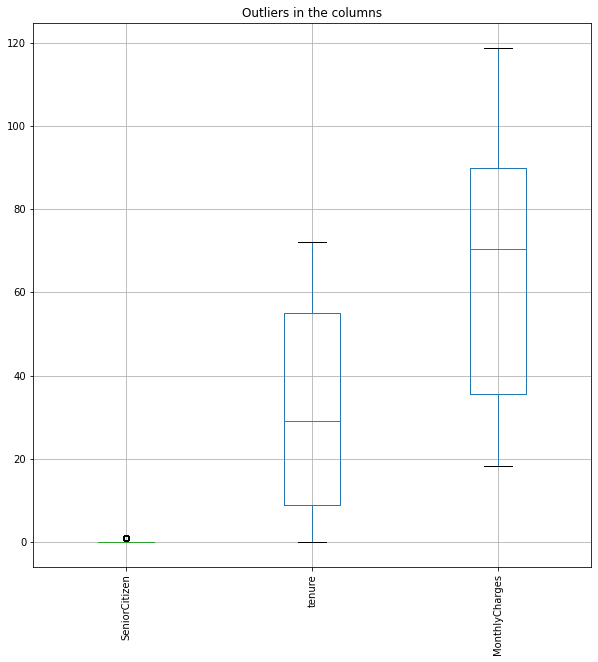

In [21]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

There are no outliers in the columns, except the senior citizens who are being treated as outliers as they are the minority.

<AxesSubplot:xlabel='tenure'>

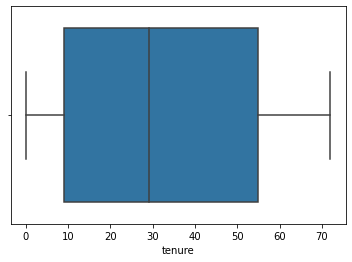

In [23]:
sns.boxplot(df['tenure'])

There are no outliers in tenure column, and the median is around 29. 25th percentile is 9 and 75th percentule is 55. 100th percentile is around 72.

<AxesSubplot:xlabel='MonthlyCharges'>

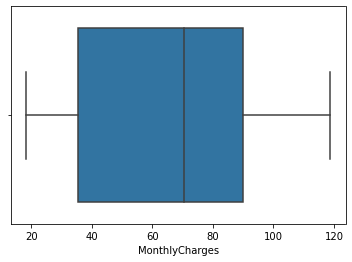

In [24]:
sns.boxplot(df['MonthlyCharges'])

There are no outliers in monthly charges column, and the median is around 70. 25th percentile is 36 and 75th percentule is 90. 100th percentile is around 119.

<AxesSubplot:xlabel='gender', ylabel='count'>

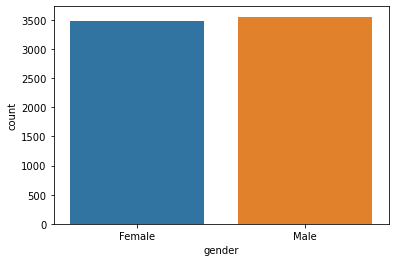

In [26]:
sns.countplot(df['gender'])

There is almost an equal amount of male and female customers.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

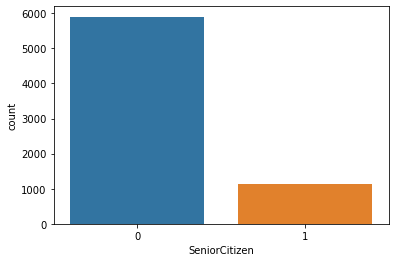

In [27]:
sns.countplot(df['SeniorCitizen'])

Maximum customers are not senior citizens and around 1200 are.

<AxesSubplot:xlabel='Partner', ylabel='count'>

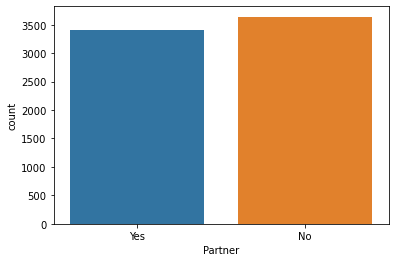

In [28]:
sns.countplot(df['Partner'])

There is almost an equal amount of customers with and without partners, with the majority having no partner.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

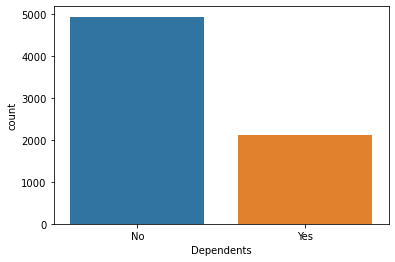

In [29]:
sns.countplot(df['Dependents'])

Maximum customers have no dependents, while around 2200 do have dependents.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

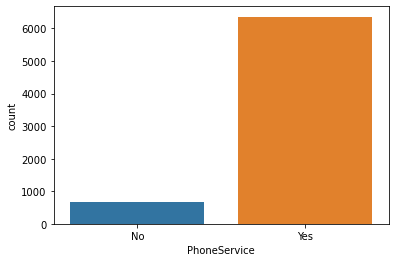

In [30]:
sns.countplot(df['PhoneService'])

Maximum customers do have phone service, and a very small minority of around 700 people do not have phone service.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

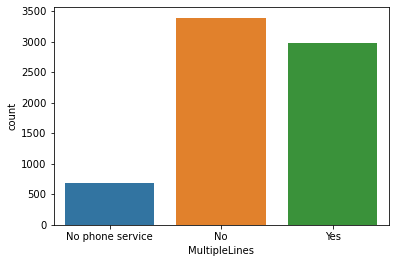

In [31]:
sns.countplot(df['MultipleLines'])

Maximum customers, around 3400, do not have a multiple lines, but around 3000 customers do have multiple lines. Around 700 customers, like we saw above, have no phone service at all.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

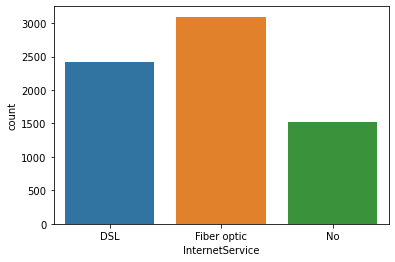

In [32]:
sns.countplot(df['InternetService'])

Maximum customers, around 3000, have fiber optic type internet connection. Almost 2500 customers have DSL type internet service. Around 1500 customers have no internet service.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

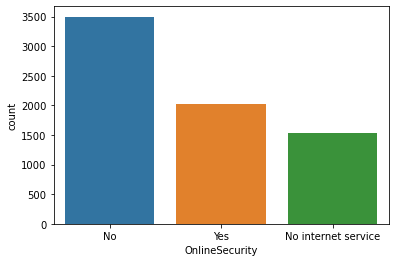

In [33]:
sns.countplot(df['OnlineSecurity'])

Maximum customers, around 3500, have no online security, around 2000 customers have online security, and around 1500 customers have no internet service.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

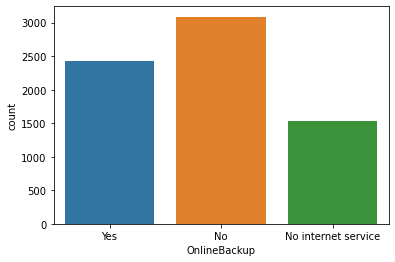

In [34]:
sns.countplot(df['OnlineBackup'])

Around 3000 customers have no online backup, around 2450 customers have online backup and around 1500 customers have no internet service.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

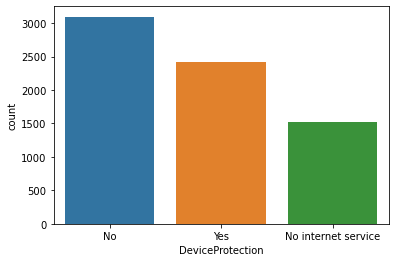

In [35]:
sns.countplot(df['DeviceProtection'])

Maximum customers, 3000+, don't have device protection. Almost 2500 customers do have device protection, and around 1500 customers have no internet service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

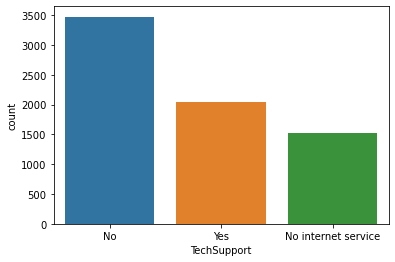

In [36]:
sns.countplot(df['TechSupport'])

Maximum customers, 3500+, don't have tech support. Around 2000 customers do have device protection, and around 1500 customers have no internet service.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

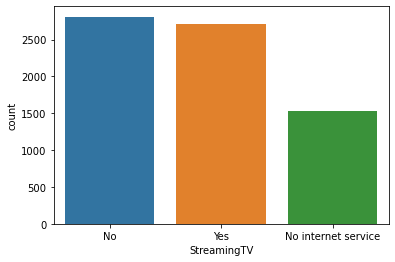

In [37]:
sns.countplot(df['StreamingTV'])

There is almost an equal amount of customers who stream tv, with the majority not streaming.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

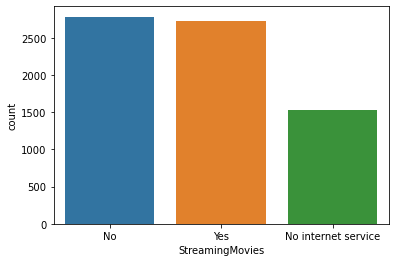

In [38]:
sns.countplot(df['StreamingMovies'])

There is almost an equal amount of customers who stream movies, with the majority not streaming.

<AxesSubplot:xlabel='Contract', ylabel='count'>

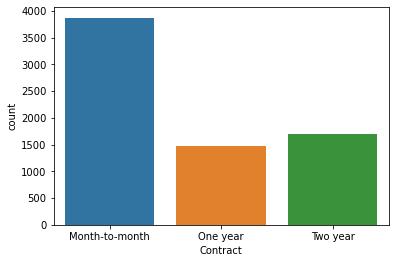

In [39]:
sns.countplot(df['Contract'])

Most customers have month-to-month contract. Second majority is of two year contracts, followed closely by one year contracts.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

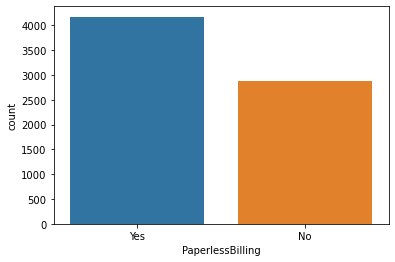

In [40]:
sns.countplot(df['PaperlessBilling'])

Maximum customers, around 4100 have paperless billing, while the others do not have paperless billing.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

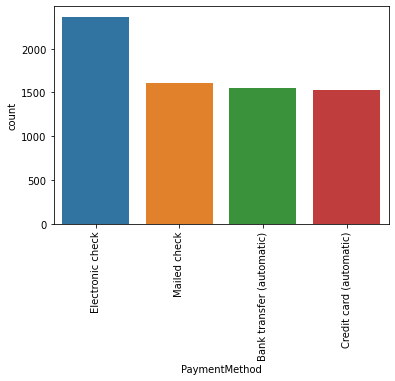

In [42]:
sns.countplot(df['PaymentMethod'])
plt.xticks(rotation=90)

Maximum customers pay by electronic check. An almost equal amount of customers use the other payment methods in the following order: Mailed check, bank transfer, and credit card.

<AxesSubplot:xlabel='Churn', ylabel='count'>

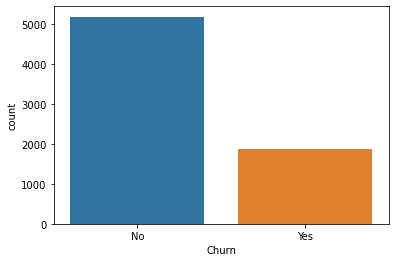

In [43]:
sns.countplot(df['Churn'])

There was no churn with maximum customers, around 5000, but there was churn of almost 2000 customers.

# Bivariate Analysis

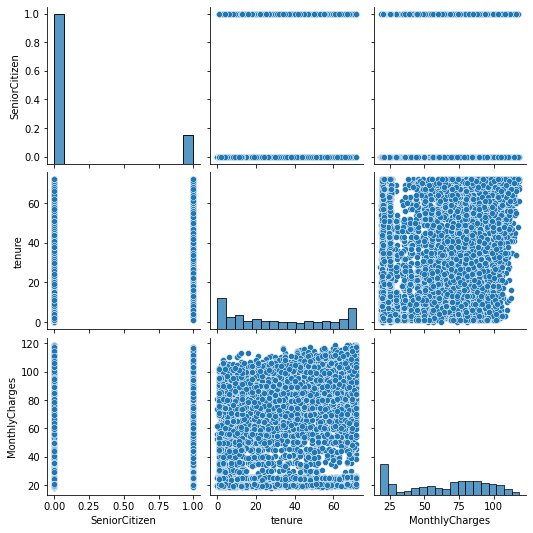

In [44]:
sns.pairplot(df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

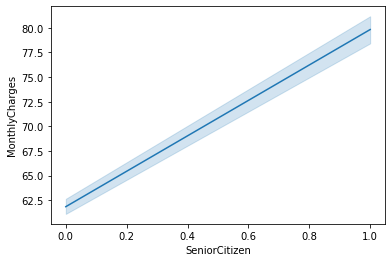

In [45]:
sns.lineplot(df['SeniorCitizen'], df['MonthlyCharges'])

Monthly charges of senior citizens are higher than the younger customers.

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

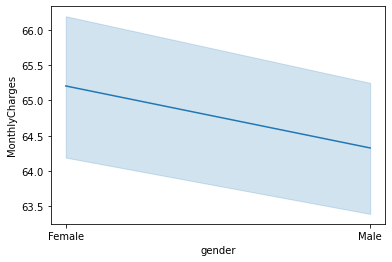

In [46]:
sns.lineplot(df['gender'], df['MonthlyCharges'])

Overall monthly charges of males are slightly lower than females

<AxesSubplot:xlabel='Dependents', ylabel='MonthlyCharges'>

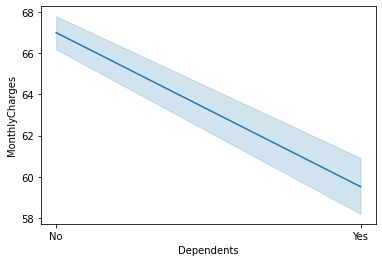

In [47]:
sns.lineplot(df['Dependents'], df['MonthlyCharges'])

Monthly charges of people with dependents is lower.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

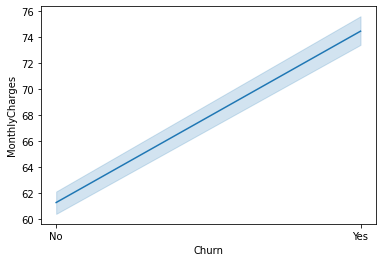

In [53]:
sns.lineplot(df['Churn'], df['MonthlyCharges'])

The monthly charges of the customers with churn were significantly higher, which could be the reason of them leaving.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

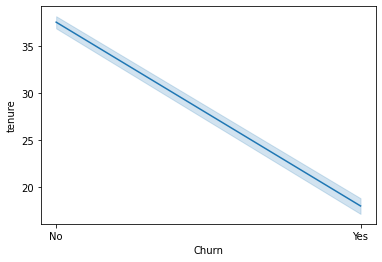

In [55]:
sns.lineplot(df['Churn'], df['tenure'])

The tenure of the people with churn is significantly less, meaning they must be newer customers of the business.

<AxesSubplot:xlabel='gender', ylabel='count'>

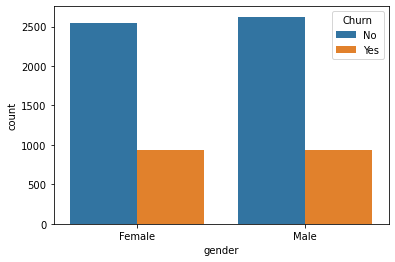

In [51]:
sns.countplot(df['gender'], hue=df['Churn'])

There is an equal amount of male and female customers with churn, but the amount of males with no churn is higher than the females.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

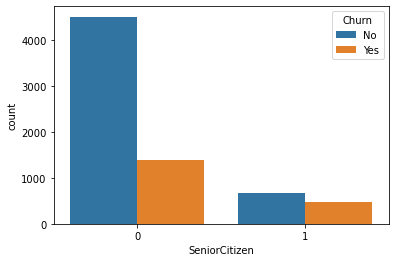

In [52]:
sns.countplot(df['SeniorCitizen'], hue=df['Churn'])

There is a much higher ratio of churn in senior citizens compared to the customers who are not senior citizens.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

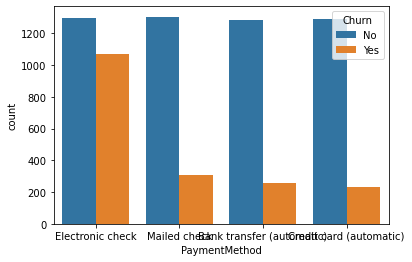

In [56]:
sns.countplot(df['PaymentMethod'], hue=df['Churn'])

The ratio of customers with churn, meaning the customers who stopped doing business with the company is much higher in the customers who used electronic check as payment method. Every other payment method has a much lower ratio of churn.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

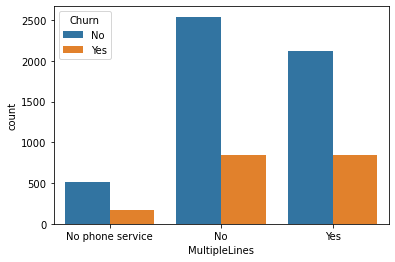

In [57]:
sns.countplot(df['MultipleLines'], hue=df['Churn'])

Ratio of churn is higher in people with multiple lines and people with no phone service compared to people with just 1 line.

<AxesSubplot:xlabel='Partner', ylabel='count'>

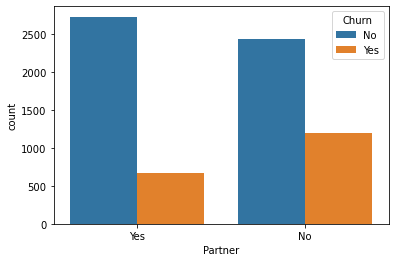

In [58]:
sns.countplot(df['Partner'], hue=df['Churn'])

There is higher churn ratio with customers who have no partner than with customers who do.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

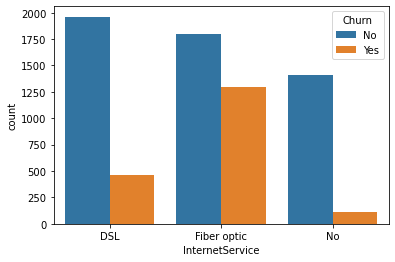

In [59]:
sns.countplot(df['InternetService'], hue=df['Churn'])

Highest ratio of churn is with customers who have fiber optic internet service, and lowest with customers who have no internet service.

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

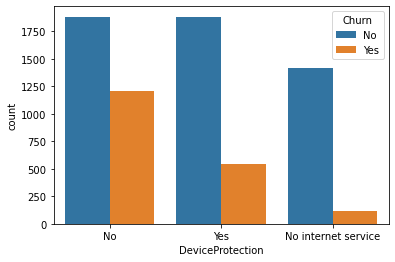

In [60]:
sns.countplot(df['DeviceProtection'], hue=df['Churn'])

Highest ratio of churn is with customers who have no device protection, and lowest with customers who have no internet service.

# Feature Engineering

# Converting total charges column to float type

In [5]:
a = -1
for i in df['TotalCharges']:
    a+=1
    try:
        i = float(i)
    except ValueError as e:
        print("error",e,"on line",a)

error could not convert string to float: '' on line 488
error could not convert string to float: '' on line 753
error could not convert string to float: '' on line 936
error could not convert string to float: '' on line 1082
error could not convert string to float: '' on line 1340
error could not convert string to float: '' on line 3331
error could not convert string to float: '' on line 3826
error could not convert string to float: '' on line 4380
error could not convert string to float: '' on line 5218
error could not convert string to float: '' on line 6670
error could not convert string to float: '' on line 6754


In [19]:
df['TotalCharges'][488] = np.nan
df['TotalCharges'][753] = np.nan
df['TotalCharges'][936] = np.nan
df['TotalCharges'][1082] = np.nan
df['TotalCharges'][1340] = np.nan
df['TotalCharges'][3331] = np.nan
df['TotalCharges'][3826] = np.nan
df['TotalCharges'][4380] = np.nan
df['TotalCharges'][5218] = np.nan
df['TotalCharges'][6670] = np.nan
df['TotalCharges'][6754] = np.nan

In [25]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Total charges is now a float type column

<AxesSubplot:>

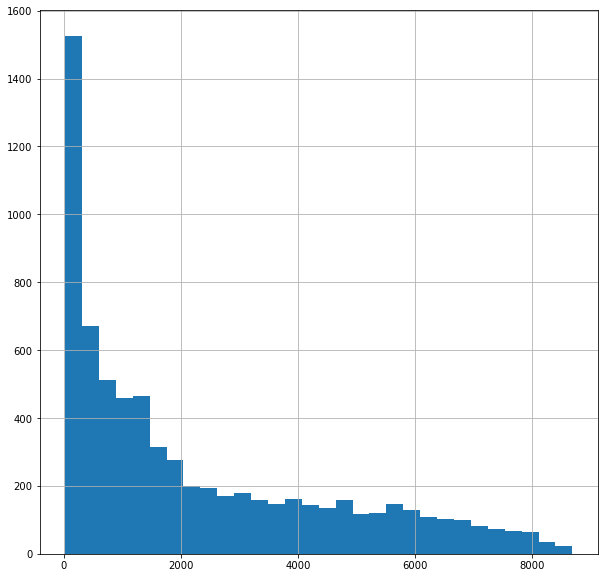

In [27]:
df['TotalCharges'].hist(figsize=(10,10), bins=30)

There is positive skewness in the totalcharges column. The data is right tailed, due to minimal amount of charges being on the higher side.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

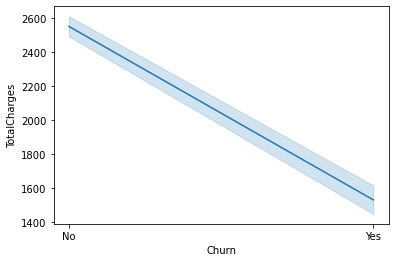

In [28]:
sns.lineplot(df['Churn'], df['TotalCharges'])

Total charges are higher for customers without churn, as it is charges accumulated over time.

# Imputing null values

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
imp = SimpleImputer(strategy='median')

In [22]:
df['TotalCharges'] = imp.fit_transform(df['TotalCharges'].values.reshape(-1,1))

In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

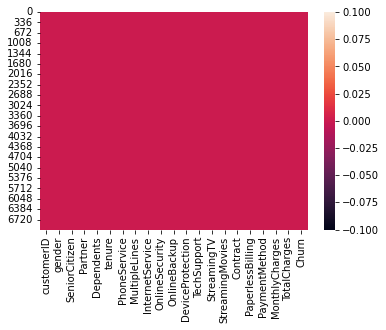

In [24]:
sns.heatmap(df.isnull())

There are no more null values in the data set.

# Skewness

In [26]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

There is skewness in senior citizen column, but we cannot remove it as it is a categorical column.
There is also some skewness in totalcharges column. We will reduce it.

In [29]:
df['TotalCharges'] = np.sqrt(df['TotalCharges'])


In [30]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.309838
dtype: float64

Skewness in total charges has been reduced signifantly.

# Dropping unnecessary columns

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,5.463515,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,43.468379,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,10.399519,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,42.903963,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,12.314625,Yes


We can drop the customerID column as it is irrelevant and has no effect on the target variable.

In [32]:
df.drop('customerID', axis=1, inplace=True)

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,5.463515,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,43.468379,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,10.399519,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,42.903963,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,12.314625,Yes


customerID column has been dropped.

# Encoding object type columns

In [34]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
le = LabelEncoder()
list1 = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))

In [36]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,5.463515,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,43.468379,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,10.399519,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,42.903963,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,12.314625,1


Now all columns are numerical type.

# SMOTE

<AxesSubplot:xlabel='Churn', ylabel='count'>

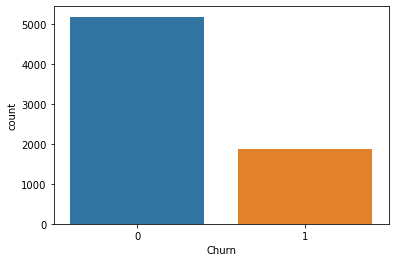

In [38]:
sns.countplot(df['Churn'])

We need to balance the data in order for the models to learn effectively.

### Splitting data for applying SMOTE

In [39]:
xi = df.iloc[:,0:-1]

In [40]:
yi = df.iloc[:,-1]
yi.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [41]:
smt = SMOTE()
x,y = smt.fit_resample(xi,yi)

In [42]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Now there are an equal amount of customers with and without churn

In [43]:
df = x
df['Churn'] = y

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,5.463515,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,43.468379,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,10.399519,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,42.903963,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,12.314625,1


# Checking multi-collinearity with Variance Inflation Factor

In [45]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [46]:
vif_calc()

,variables,VIF FACTOR
0,gender,1.761391
1,SeniorCitizen,1.265007
2,Partner,2.519789
3,Dependents,1.830157
4,tenure,35.786370
5,PhoneService,15.532421
6,MultipleLines,2.812297
7,InternetService,4.578900
8,OnlineSecurity,2.104071
9,OnlineBackup,2.255717


<AxesSubplot:>

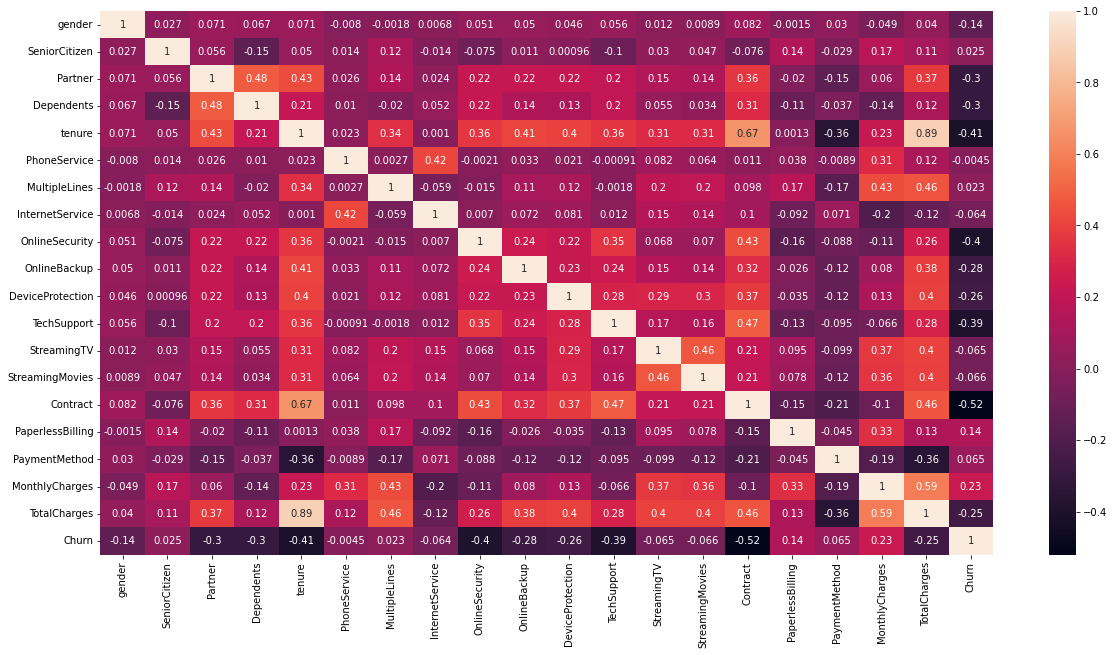

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

We can observe that tenure is highly correlated with contract and totalcharges, and it has high negative correlation with churn. 
Total charges column has lower correlation with churn and high correlation with monthly charges and tenure.

We will drop total charges column as tenure and monthly charges cover the information it contains.

In [50]:
df.drop('TotalCharges', axis=1, inplace=True)

In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


We can see it has been removed from the dataframe.

In [52]:
vif_calc()

,variables,VIF FACTOR
0,gender,1.758747
1,SeniorCitizen,1.264753
2,Partner,2.519333
3,Dependents,1.829893
4,tenure,6.549894
5,PhoneService,15.394947
6,MultipleLines,2.796985
7,InternetService,4.474375
8,OnlineSecurity,2.096939
9,OnlineBackup,2.237701


<AxesSubplot:>

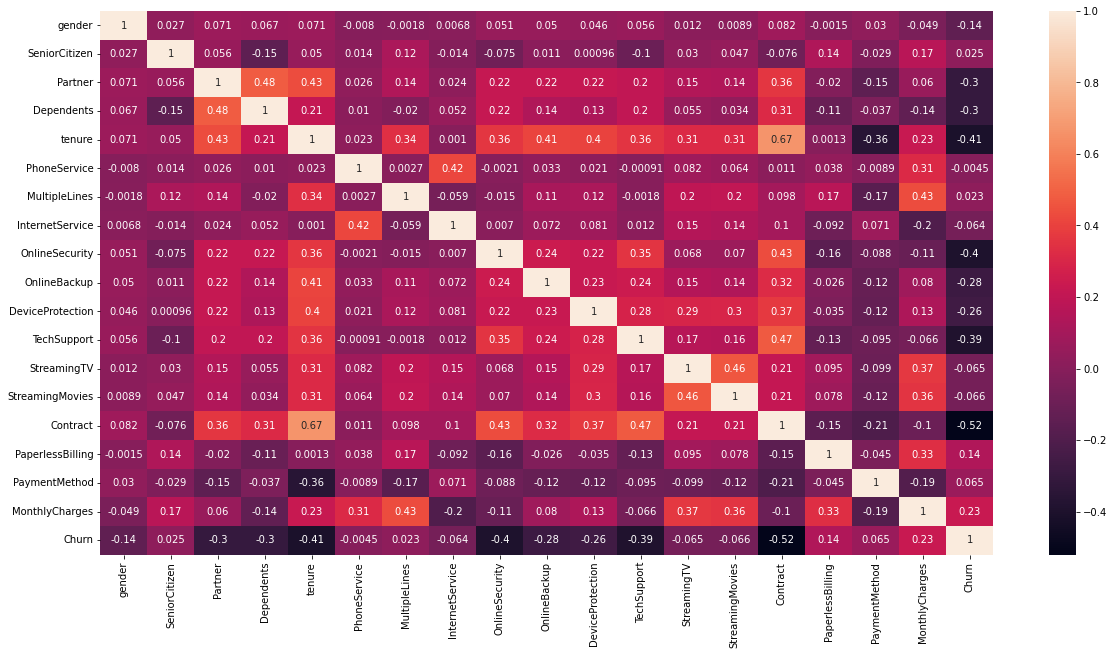

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

We can also observe that mutli-collinearity has significantly reduced now.

# Training and Testing

### Splitting data for training and testing

In [54]:
x = df.iloc[:,0:-1]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.850000
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.950000
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.850000
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.300000
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,0,62,1,2,1,0,1,0,0,2,2,1,0,0,99.995998
10344,0,0,0,0,30,0,0,0,0,0,1,2,0,0,0,0,1,54.482824
10345,0,0,0,0,33,1,2,1,0,2,2,1,2,2,0,1,2,109.566987
10346,0,0,0,0,15,1,2,1,0,0,0,0,0,0,0,0,2,72.979626


In [55]:
y = df.iloc[:,-1]
y

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int32

### Models

In [56]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [57]:
models = [lr, knn, svc, dtc, rf]

### Finding best random state

In [58]:
best_random_state = 0
best_score = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 0, accuracy score is 0.7966183574879228
At random score 1, accuracy score is 0.7946859903381642
At random score 2, accuracy score is 0.797584541062802
At random score 3, accuracy score is 0.7840579710144927
At random score 4, accuracy score is 0.7816425120772947
At random score 5, accuracy score is 0.8014492753623188
At random score 6, accuracy score is 0.7942028985507247
At random score 7, accuracy score is 0.7797101449275362
At random score 8, accuracy score is 0.8033816425120773
At random score 9, accuracy score is 0.7869565217391304
At random score 10, accuracy score is 0.7966183574879228
At random score 11, accuracy score is 0.7913043478260869
At random score 12, accuracy score is 0.7806763285024154
At random score 13, accuracy score is 0.7927536231884058
At random score 14, accuracy score is 0.7816425120772947
At random score 15, accuracy score is 0.7879227053140097
At random score 16, accuracy score is 0.7903381642512077
At random score 17, accuracy score is 0.78

### We will proceed with random state 92

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=92)

In [60]:
for i in models:
    i.fit(xtrain,ytrain)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    pred = i.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'Model {i} had training score of {training_score.mean()*100}% and an accuracy score of {score}')

Model LogisticRegression() had training score of 78.71466935213158% and an accuracy score of 0.8193236714975846
Model KNeighborsClassifier() had training score of 79.1376227797481% and an accuracy score of 0.8120772946859903
Model SVC() had training score of 75.65842053796868% and an accuracy score of 0.7797101449275362
Model DecisionTreeClassifier() had training score of 78.37658537297312% and an accuracy score of 0.7922705314009661
Model RandomForestClassifier() had training score of 83.35354729483193% and an accuracy score of 0.8594202898550725


### We will proceed with random forest classifier

In [61]:
parameters = { 
    'n_estimators': [200, 400],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': range(1,3)
}

In [64]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [65]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

### These are the parameters we will enter in the model for final training and testing

In [66]:
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, n_estimators=400)

In [67]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 83.53463374053153


In [70]:
print(f'The accuracy score is {accuracy_score(ytest, pred)*100}')

The accuracy score is 85.41062801932368


In [71]:
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

[[911 159]
 [143 857]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1070
           1       0.84      0.86      0.85      1000

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



# AUC-ROC

Visual representation of the confusion matrix

In [72]:
pred = rf.predict_proba(xtest)[:,1]

In [73]:
pred

array([0.49  , 0.0925, 0.015 , ..., 0.48  , 0.7375, 0.4225])

In [74]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

<function matplotlib.pyplot.show(close=None, block=None)>

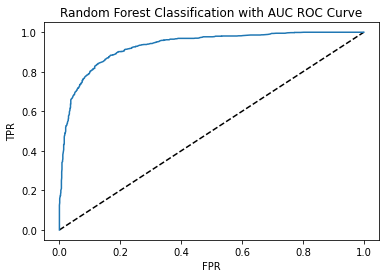

In [75]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest Classification with AUC ROC Curve')
plt.show

We can observe that maximum area is under the curve, which means the model performed well.

In [76]:
auc_score = roc_auc_score(ytest, pred)
auc_score

0.9302901869158878

## Conclusion: Random Forest Classifier is the best model with cross val score of 83.53%, and accuracy score of 85.41%, and roc-auc score of 93.02%

# Saving the best model

In [77]:
import pickle
filename = 'customerchurn.pkl'
pickle.dump(rf, open(filename, 'wb'))